# Проект о рейтингах фильмов сайта Fandango

<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em><a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, сможем ли мы прийти к тем же выводам, которые приведены в статье. Определим, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

----



### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Сравниваем рейтинги Fandango и другие пользовательские рейтинги

Сначала давайте изучим рейтинги Fandango и посмотрим, совпадут ли результаты нашего анализа с выводами в статье.

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango[:5]

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Давайте изучим связь между популярностью фильма и его рейтингом. Нарисуем график scatterplot, показывающий связь между колонками RATING и VOTES.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

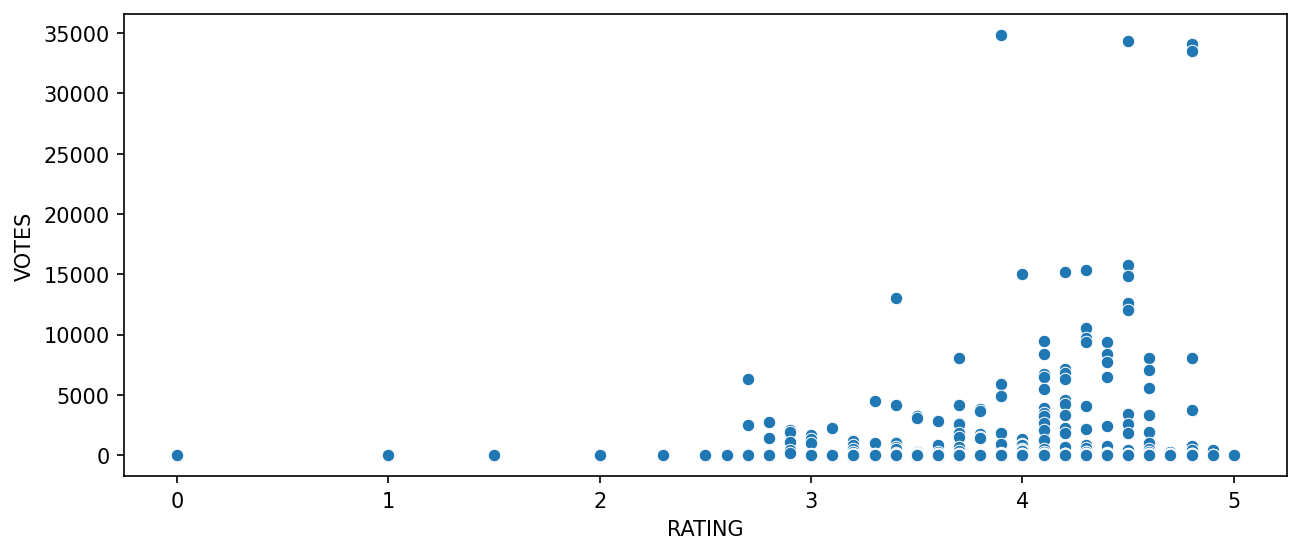

In [3]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

<em>По графику видно, что есть выбросы по рейтингу и по голосам.</em>

**Вычисляем корреляцию между колонками:**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<em>Между Stars и рейтингом высокая корреляция, значит между ними большая связь.</em>

**Создадим новую колонку, в ней возьмем из строки FILM только год, и назовем эту новую колонку YEAR**

In [4]:
fandango['YEAR'] = fandango['FILM'].apply(lambda name: name.split()[-1].replace('(', '').replace(')',''))
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Найдем сколько фильмов содержится в наборе данных Fandango, в разбивке по годам?**

In [9]:
fandango['YEAR'].value_counts()

2015    478
2014     23
1964      1
2016      1
2012      1
Name: YEAR, dtype: int64

**Визуализируем количество фильмов в год с помощью графика:**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

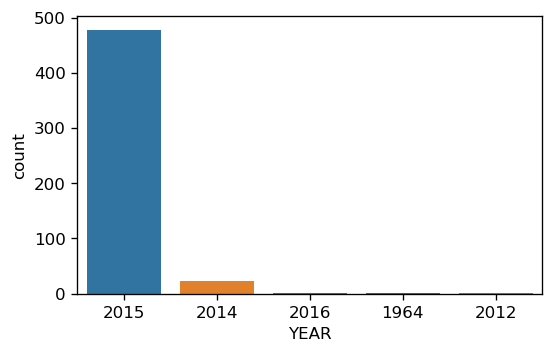

In [16]:
plt.figure(figsize=(5,3),dpi=120)
sns.countplot(data=fandango, x='YEAR')

**Найдем какие 10 фильмов получили наибольшее количество голосов (votes).**

In [5]:
high_sum_votes = fandango.copy()
high_sum_votes['VOTES'] = high_sum_votes['VOTES'].sort_values(ascending=False)
high_sum_votes[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Найдем сколько фильмов имеет нулевое количество голосов (votes).**

In [12]:
sum(fandango['VOTES'] == 0)

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса (votes).**

In [6]:
voted = fandango.copy()
voted = voted[voted['VOTES'] > 0]
voted

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю. Давайте визуализируем эту разницу распределений.**

**Создадим график KDE plot (или несколько таких графиков), который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).**

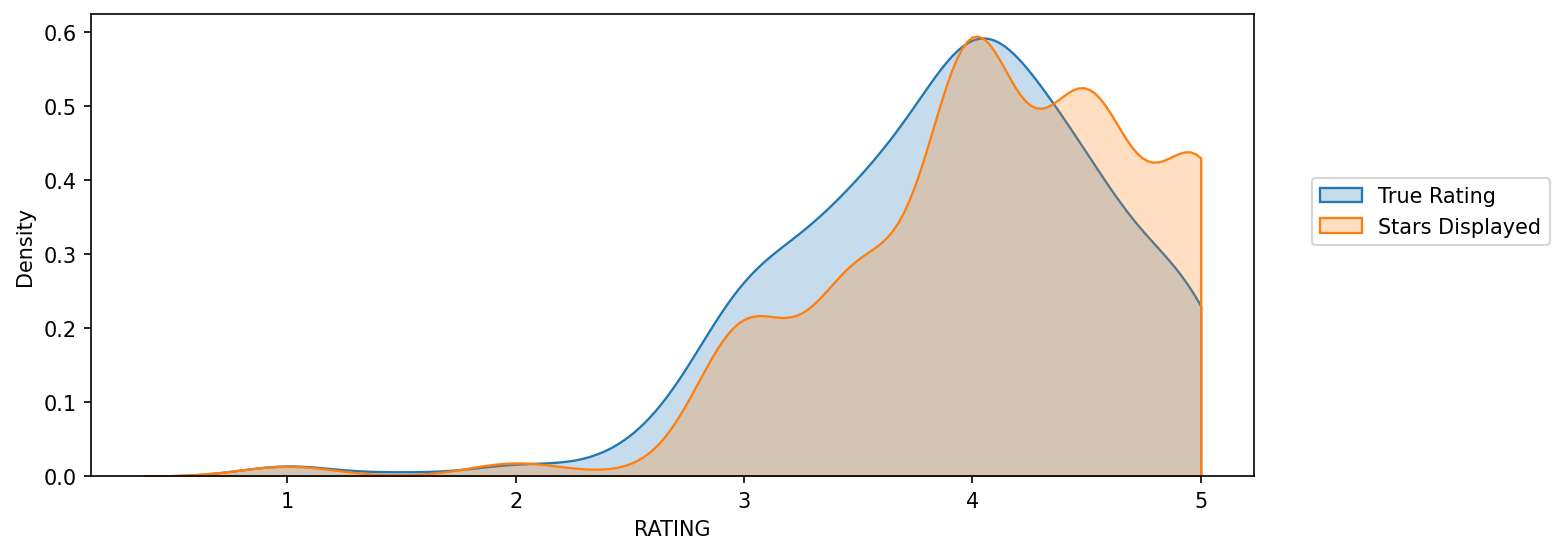

In [12]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=voted, x='RATING', clip=[0,5], lw=1.1, fill=True, label='True Rating')
sns.kdeplot(data=voted, x='STARS', clip=[0,5], lw=1.1, fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

**Теперь посчитаем эту разницу в численном виде; Создадим новую колонку, в которой сохраним разницу между колонками STARS и RATING.**

In [7]:
voted['STARS_DIFF'] = voted['STARS'] - voted['RATING']
voted['STARS_DIFF'] = voted['STARS_DIFF'].round(1)
voted

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

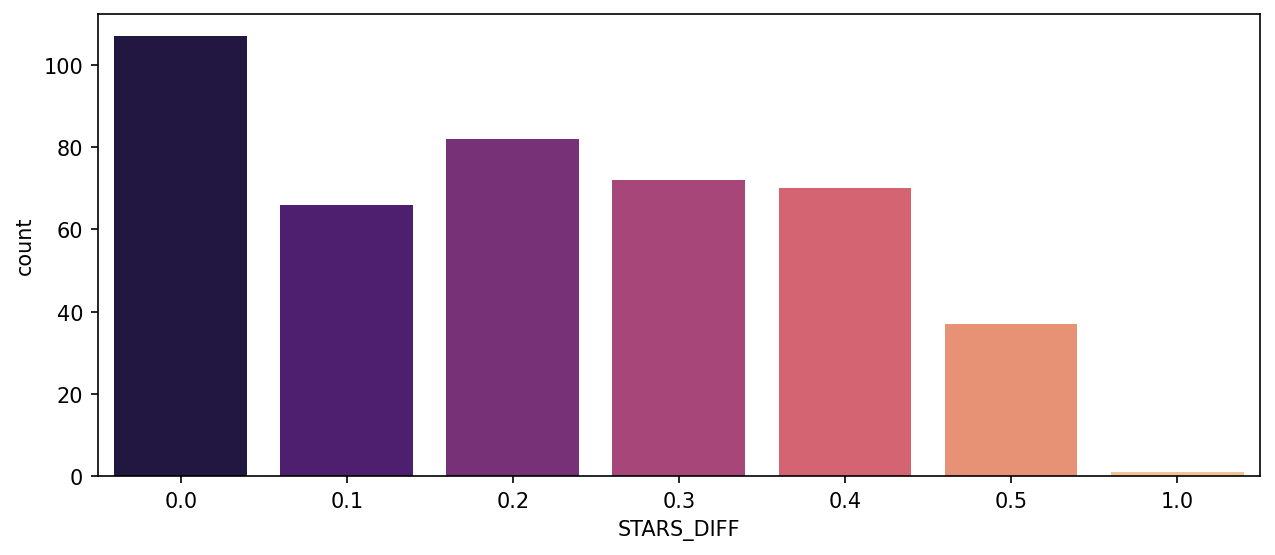

In [14]:
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=voted, x='STARS_DIFF', palette='magma')

**На этом графике мы видим, что один из фильмов имеет разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом! Давайте найдем этот фильм.**

In [15]:
voted[voted['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

In [9]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
all_sites[:5]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

Начнём с рейтингов Rotten Tomatoes. Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Нарисуем график scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами.**

(0.0, 100.0)

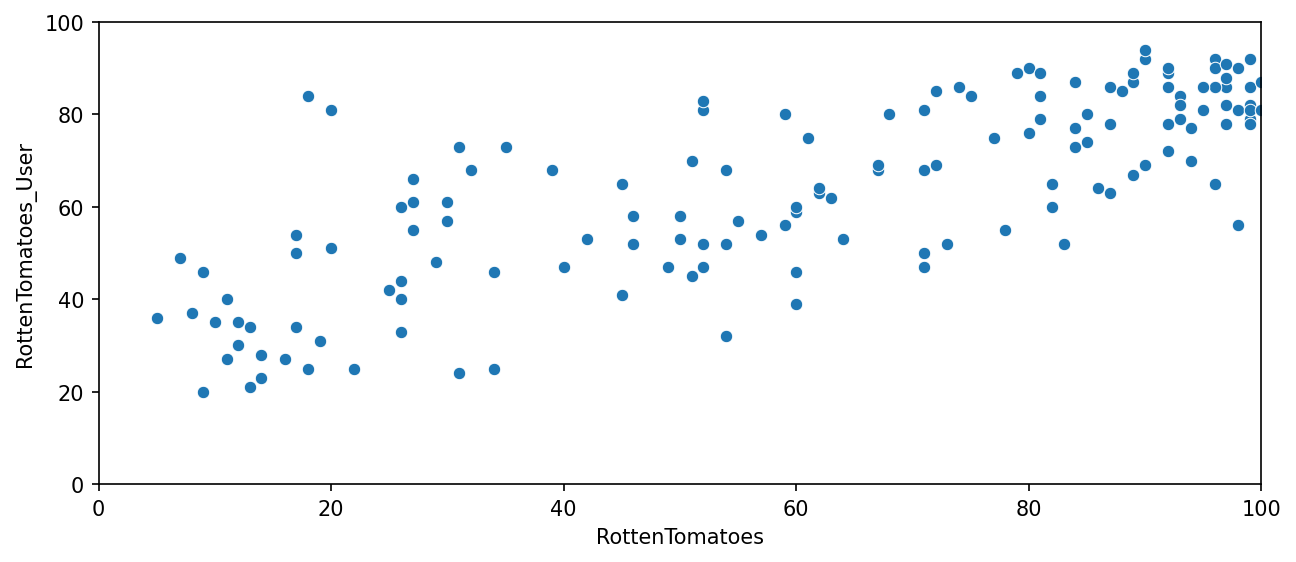

In [27]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Давайте изучим численную разницу между этими двумя рейтингами. Мы посчитаем эту разницу с помощью формулы RottenTomatoes-RottenTomatoes_User. Полученные значения Rotten_Diff - это рейтинг критиков минус рейтинг пользователей. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

**Создадим новую колонку, в которой сохраним разницу между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes.**

In [10]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных. Поскольку разница может быть как положительной, так и отрицательной, то давайте сначала возьмём абсолютные величины всех значений, и только после этого посчитаем среднее значение. Таким образом мы получим среднее значение абсолютной разницы между рейтингами от критиков и пользовательскими рейтингами.

**Вычислим среднюю абсолютную разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes, согласно описанию выше.**

In [24]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes. На этом графике будут отрицательные значения.**

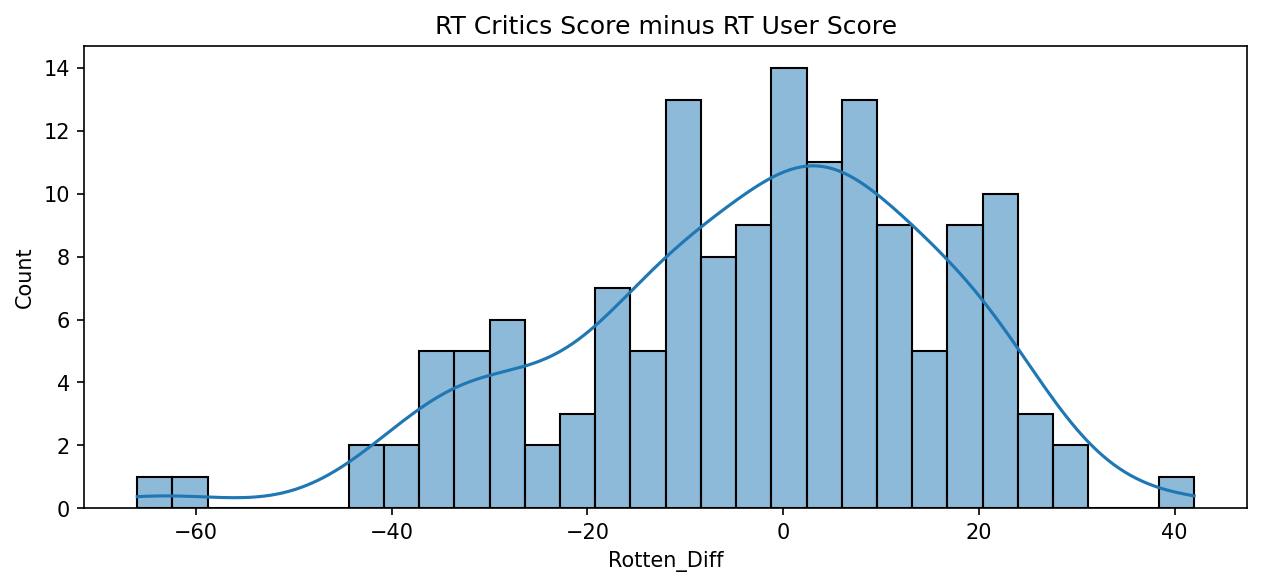

In [26]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=30)
plt.title("RT Critics Score minus RT User Score");

**Далее нарисуем график распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes.**

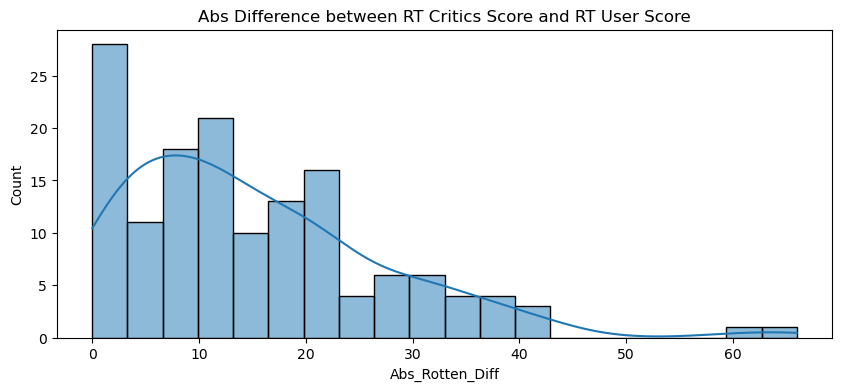

In [25]:
all_sites['Abs_Rotten_Diff'] = all_sites['Rotten_Diff'].abs()
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites, x='Abs_Rotten_Diff', kde=True, bins=20)
plt.title("Abs Difference between RT Critics Score and RT User Score");

**Давайте выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведите 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов. Поскольку мы вычисляли разницу рейтингов по формуле Critics Rating - Users Rating, большие по модулю отрицательные значения говорят о том, что пользователи в среднем оценили эти фильмы намного выше, чем критики.**

**Какие 5 фильмов в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [27]:
Users_Love_but_Critics_Hate = all_sites[['FILM', 'Rotten_Diff']]
Users_Love_but_Critics_Hate.sort_values('Rotten_Diff')[:5]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Далее наоборот - отобразим 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [28]:
all_sites[['FILM','Rotten_Diff']].sort_values('Rotten_Diff', ascending=False)[:5]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic

Далее давайте быстро взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

**Нарисуем график scatterplot для сравнения рейтингов Metacritic и Metacritic User.**

(0.0, 10.0)

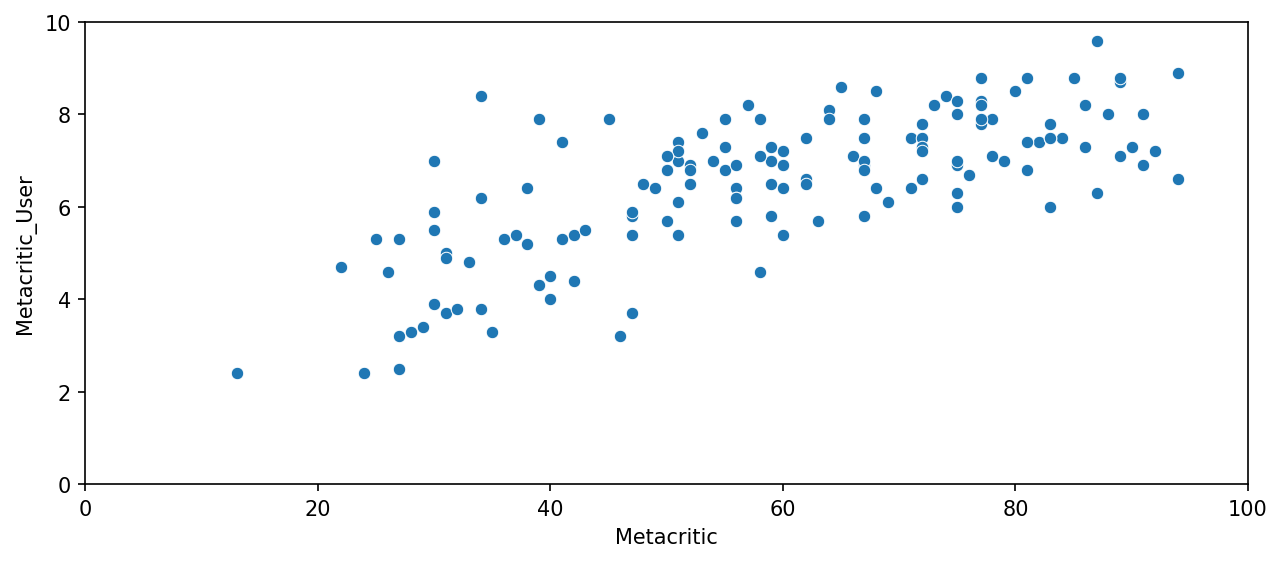

In [32]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## Рейтинги от IMDB

И наконец, посмотрим на рейтинги от IMDB. Обратите внимание, что Metacritic и IMDB показывают количество голосов. Посмотрим на наиболее популярные фильмы.

**Нарисуем график scatterplot для изображения связи между количеством голосов на MetaCritic и количеством голосов на IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

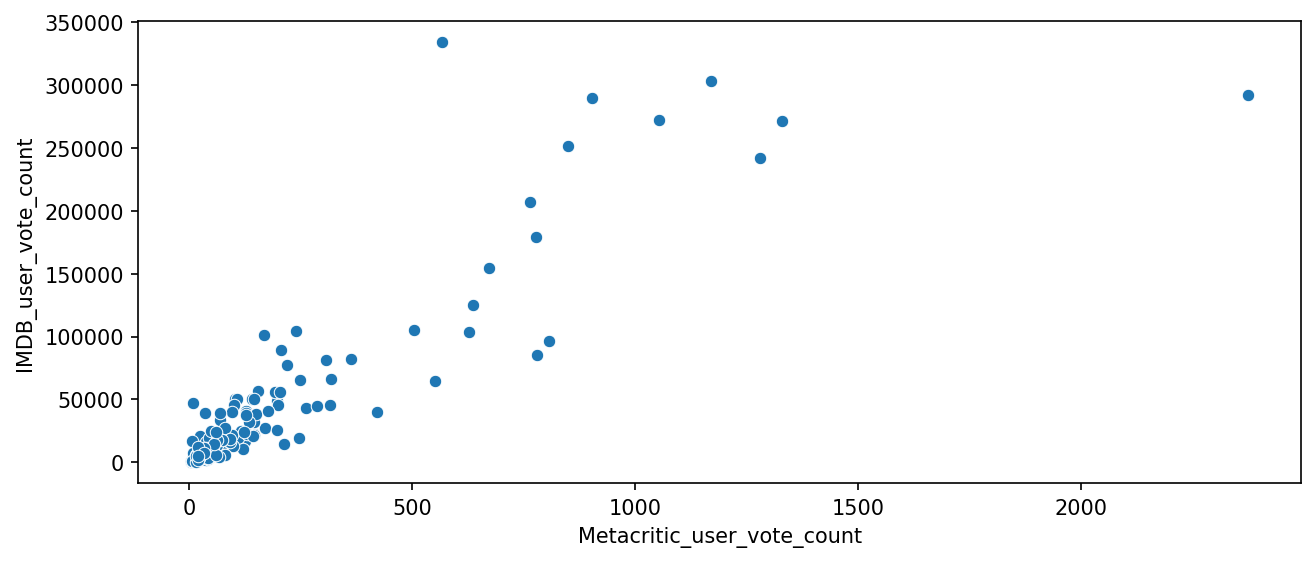

In [33]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

**Здесь мы видим два "выброса" - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Что это за фильм?**

**Какой фильм получил наибольшее количество голосов на IMDB?**

In [34]:
all_sites[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [35]:
all_sites[all_sites['Metacritic_user_vote_count'] == all_sites['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Давайте наконец выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Объединим таблицу fandango с таблицей all_sites. Не каждый фильм в таблице Fandango найдётся в таблице all_sites, потому что некоторые фильмы Fandango имеют очень мало отзывов или вообще не имеют отзывов.**

In [16]:
joined_tables = pd.merge(fandango, all_sites, how='inner', on='FILM')

In [34]:
joined_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  Abs_Rotten_Diff             145 non

In [35]:
joined_tables[:5]

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Обратите внимание, что компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

**Добавим дополнительные колонки в all_sites, и запишим в них нормализованные значения рейтингов от 0 до 5.**

In [17]:
joined_tables['RottenTomatoes_5_star'] = joined_tables['RottenTomatoes'].apply(lambda n: n/20).round(1)
joined_tables['RottenTomatoes_User_5_star'] = joined_tables['RottenTomatoes_User'].apply(lambda n: n/20).round(1)
joined_tables['Metacritic_5_star'] = joined_tables['Metacritic'].apply(lambda n: n/20).round(1)
joined_tables['Metacritic_User_5_star'] = joined_tables['Metacritic_User'].apply(lambda n: n/2).round(1)
joined_tables['IMDB_5_star'] = joined_tables['IMDB'].apply(lambda n: n/2).round(1)

In [18]:
joined_tables

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoes_5_star,RottenTomatoes_User_5_star,Metacritic_5_star,Metacritic_User_5_star,IMDB_5_star
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


**Далее создадим DataFrame с названием norm_scores, в котором оставим только нормализованные рейтинги. Также оставим колонки STARS и RATING из исходной таблицы fandango.**

In [19]:
norm_scores = joined_tables.copy()

In [20]:
norm_scores = norm_scores.drop(['VOTES','YEAR','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User',
                  'IMDB','Metacritic_user_vote_count','IMDB_user_vote_count','Rotten_Diff','Abs_Rotten_Diff'], axis=1)

KeyError: "['Abs_Rotten_Diff'] not found in axis"

In [21]:
norm_scores

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoes_5_star,RottenTomatoes_User_5_star,Metacritic_5_star,Metacritic_User_5_star,IMDB_5_star
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


### Сравнение распределений рейтингов от разных компаний


А теперь момент истины! Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**Нарисуем график, сравнивающий распределения нормализованных рейтингов от всех компаний.**

p.s. Чтобы переместить легенду на графике seaborn kdeplot, то это можно сделать вот так: https://github.com/mwaskom/seaborn/issues/2280

In [22]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

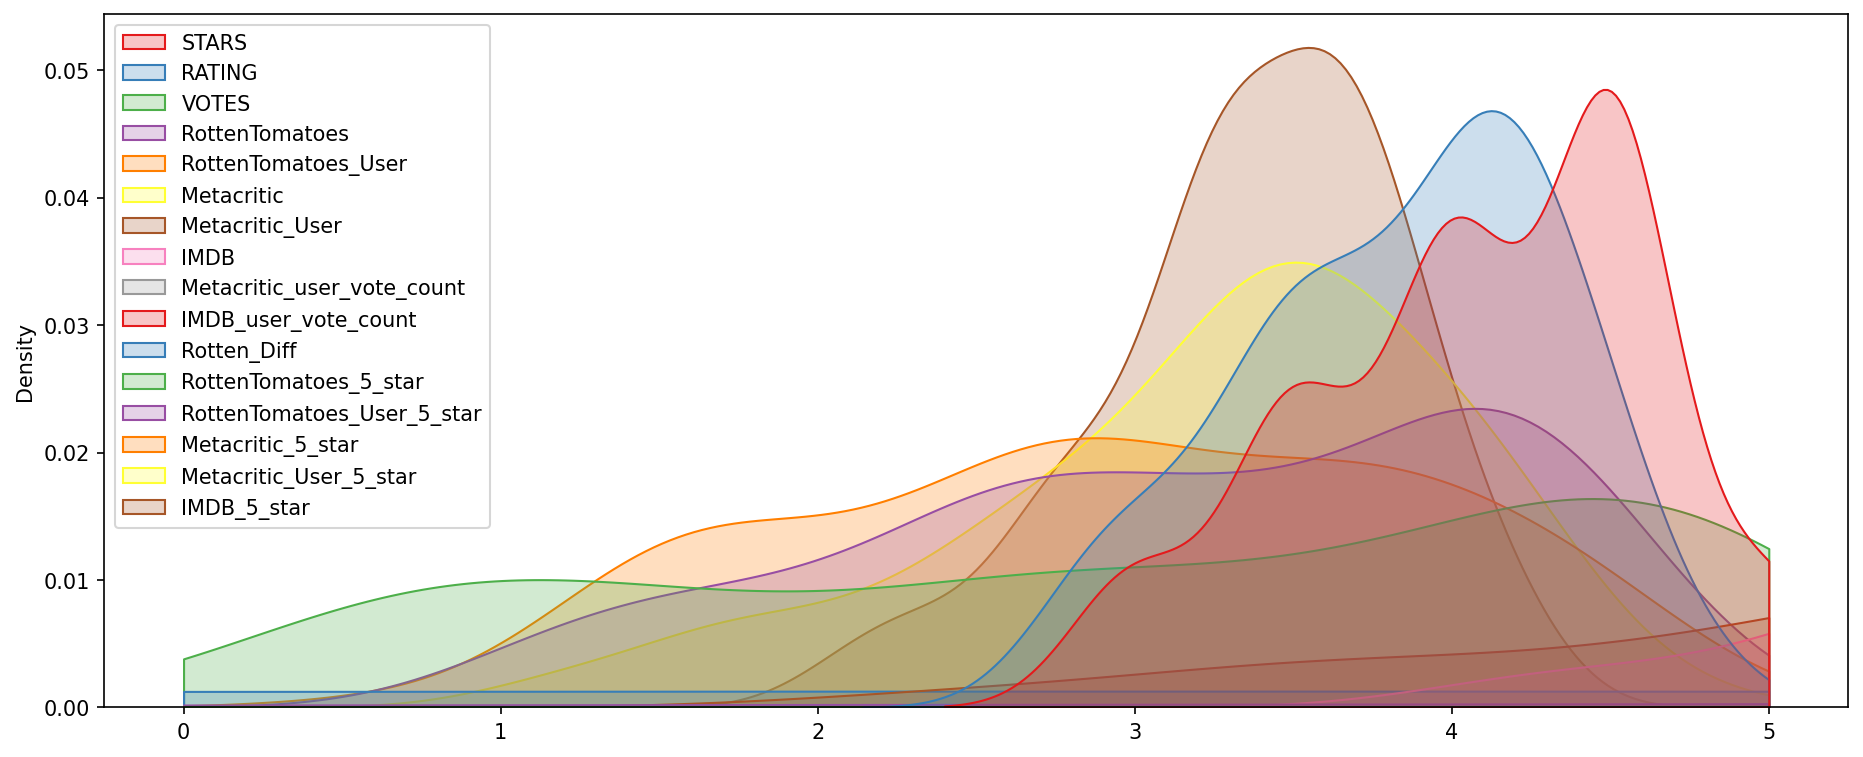

In [23]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

**Нарисуем график KDE plot, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango.**

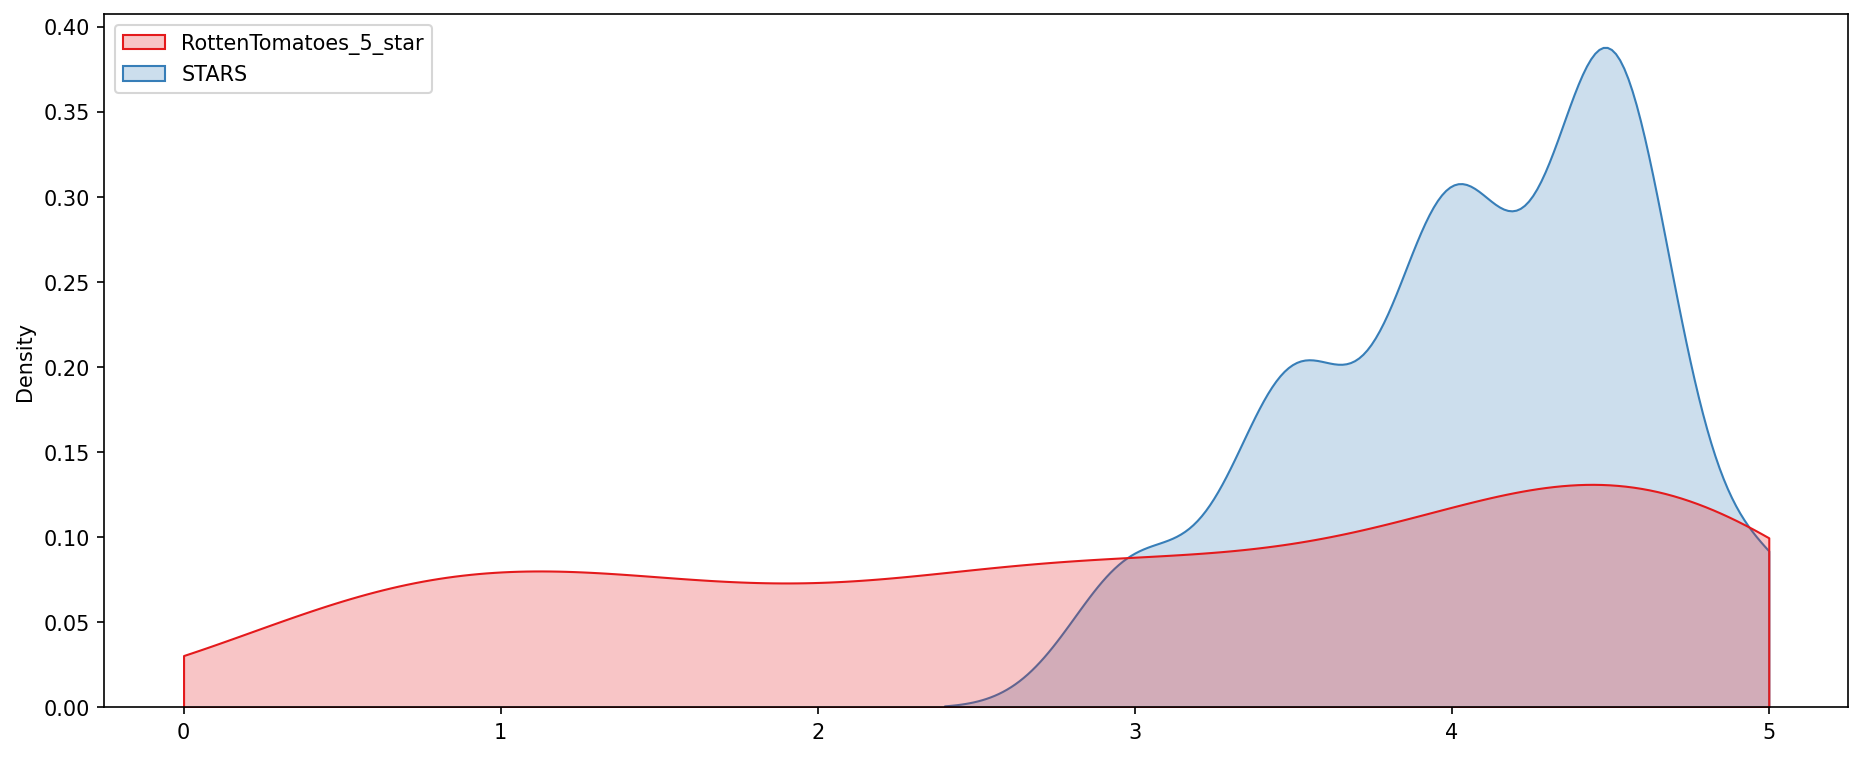

In [24]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RottenTomatoes_5_star','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**Нарисуем график clustermap для всех нормализованных рейтингов. Обратим внимание на отличия в рейтингах между разными компаниями. Фильмы с высокими рейтингами должны попадать в одни кластеры, а фильмы с низкими рейтингами в другие кластеры.**

In [35]:
films = norm_scores.drop('FILM', axis=1)

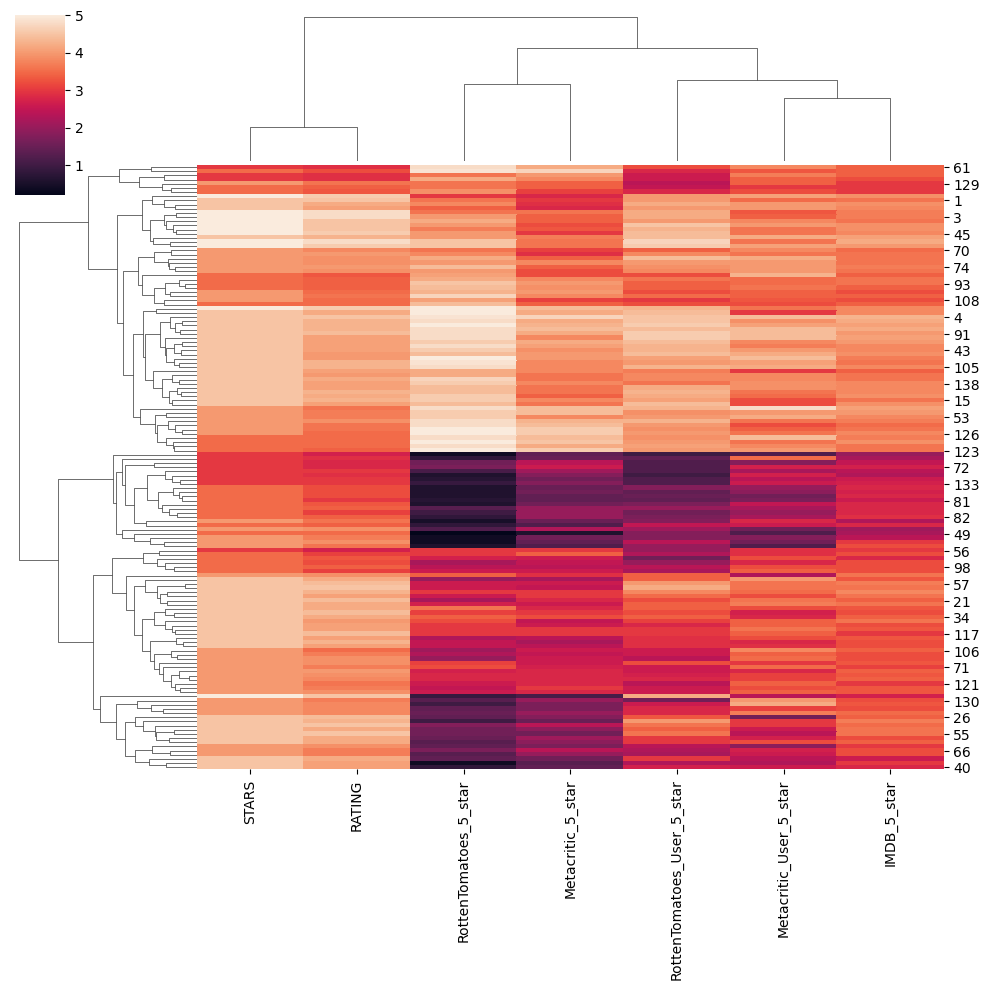

In [49]:
sns.clustermap(films)

<em>Видим, что темные фрагменты, указывающие на низкий рейтинг в STARS и RATING не наблюдаются</em>

**Мы видели, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов. Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [30]:
the_worsest_10 = norm_scores.sort_values('RottenTomatoes_5_star')[:10]

In [31]:
the_worsest_10

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RottenTomatoes_5_star,RottenTomatoes_User_5_star,Metacritic_5_star,Metacritic_User_5_star,IMDB_5_star
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,3054,2015,5,36,13,2.4,4.3,211,15004,-31,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,6757,2015,9,46,26,4.6,6.1,240,104235,-37,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,6288,2015,9,20,27,2.5,4.0,421,39838,-11,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,917,2015,7,49,28,3.3,5.9,67,4260,-42,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,2618,2015,8,37,31,3.7,4.9,78,17061,-29,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,2800,2015,10,35,30,5.5,4.6,75,19658,-25,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,210,2015,13,21,37,5.4,4.6,5,952,-8,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,811,2015,11,40,24,2.4,6.3,80,21319,-29,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,821,2015,11,27,32,3.8,5.4,39,14346,-16,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,973,2015,13,34,31,5.0,5.5,37,3200,-21,0.6,1.7,1.6,2.5,2.8


**Подошли к финалу. Давайте сделаем визуализацию распределения рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

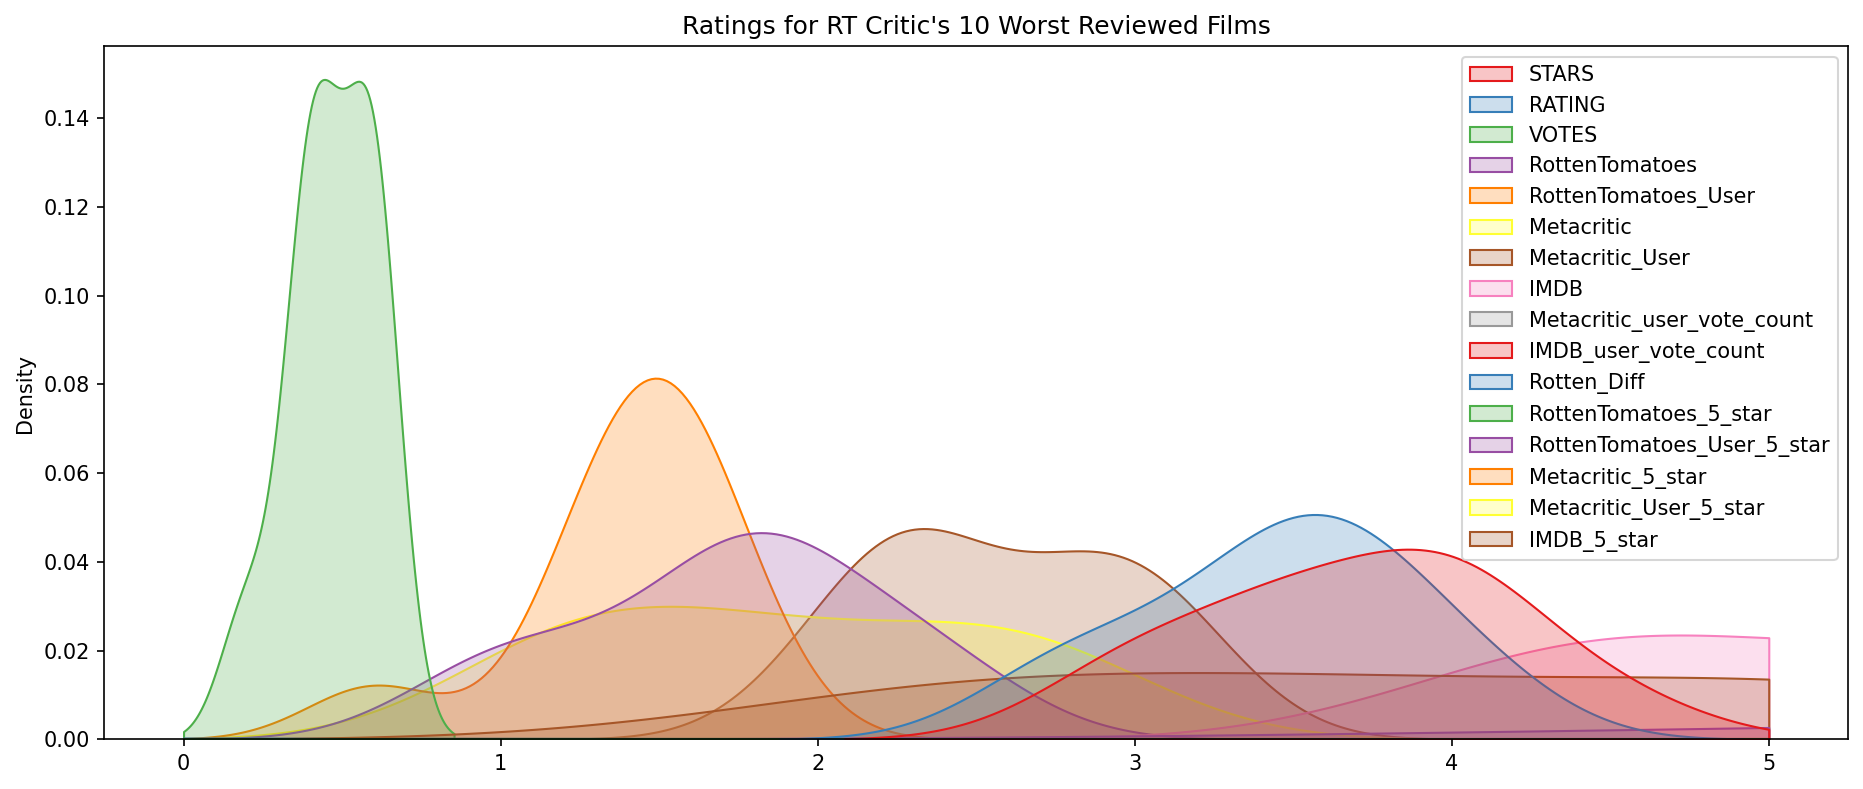

In [32]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=the_worsest_10,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: вот это да! Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными!**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний!**

In [36]:
films.iloc[25]

STARS                            4.5
RATING                           4.1
VOTES                           6757
YEAR                            2015
RottenTomatoes                     9
RottenTomatoes_User               46
Metacritic                        26
Metacritic_User                  4.6
IMDB                             6.1
Metacritic_user_vote_count       240
IMDB_user_vote_count          104235
Rotten_Diff                      -37
RottenTomatoes_5_star            0.4
RottenTomatoes_User_5_star       2.3
Metacritic_5_star                1.3
Metacritic_User_5_star           2.3
IMDB_5_star                        3
Name: 25, dtype: object

In [37]:
0.4+2.3+1.3+2.3+3

9.3

In [39]:
#Средний рейтинг других вэб-сайтов для фильма Taken 3
9.3/5

1.86

----